In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import pandas as pd

# قراءة الملف
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes.csv')

# عرض أول 5 صفوف من البيانات
print(df)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


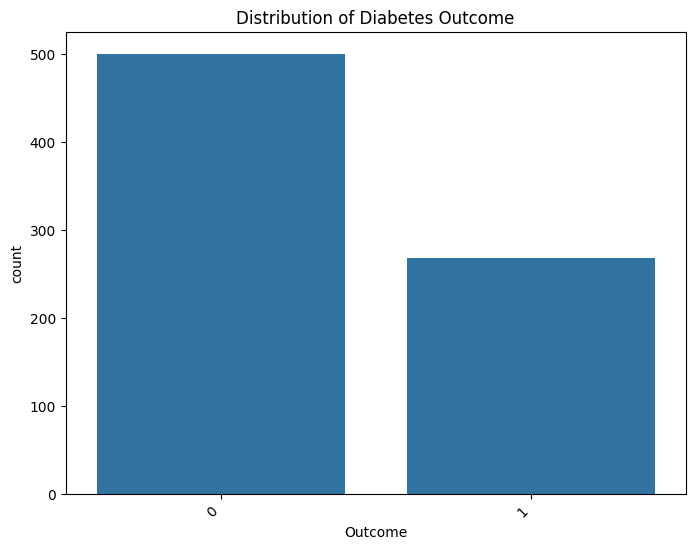

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# رسم بياني لتوزيع النتائج
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Outcome')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Diabetes Outcome')
plt.show()


In [13]:
# تقسيم البيانات إلى ميزات (X) والهدف (y)
X = df.drop('Outcome', axis=1)  # ميزات المدخلات
y = df['Outcome']  # الهدف


In [14]:
from sklearn.model_selection import train_test_split

# تقسيم البيانات إلى مجموعات تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

# عرض أبعاد البيانات بعد التقسيم
print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, {y_test.shape}")


Training data shape: (514, 8), (514,)
Testing data shape: (254, 8), (254,)


In [15]:
from sklearn.naive_bayes import GaussianNB

# إنشاء نموذج Gaussian Naive Bayes
model = GaussianNB()

# تدريب النموذج باستخدام بيانات التدريب
model.fit(X_train, y_train)

# عرض رسالة توضح انتهاء عملية التدريب
print("Model training complete.")


Model training complete.


In [16]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

# استخدام النموذج المدرب للتنبؤ بالقيم على بيانات الاختبار
y_pred = model.predict(X_test)

# حساب الدقة ودرجة F1
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")

# عرض النتائج
print(f'Accuracy: {accuracy:.2f}')  # عرض دقة النموذج
print(f'F1 Score: {f1:.2f}')  # عرض درجة F1 (مقياس للاتساق بين الدقة والاسترجاع)


Accuracy: 0.68
F1 Score: 0.67


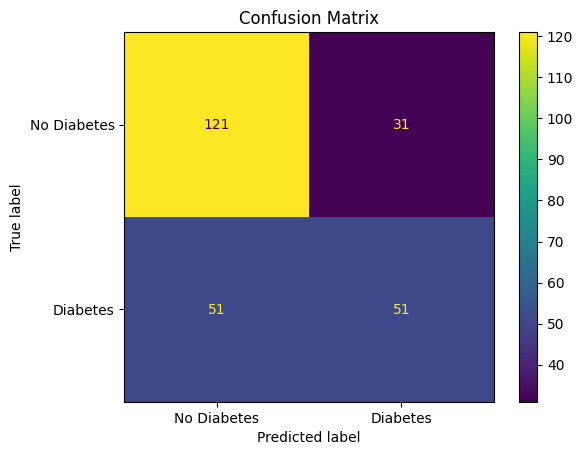

In [17]:
# إنشاء وعرض مصفوفة الارتباك
labels = ["No Diabetes", "Diabetes"]  # تسمية الفئات
cm = confusion_matrix(y_test, y_pred)  # حساب مصفوفة الارتباك بناءً على النتائج الفعلية والمتوقعة
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)  # تجهيز الرسم البياني
disp.plot()  # عرض مصفوفة الارتباك
plt.title('Confusion Matrix')  # عنوان للرسم البياني
plt.show()  # عرض الرسم


In [18]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred = model.predict(X_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.6771653543307087
F1 Score: 0.684746683234644


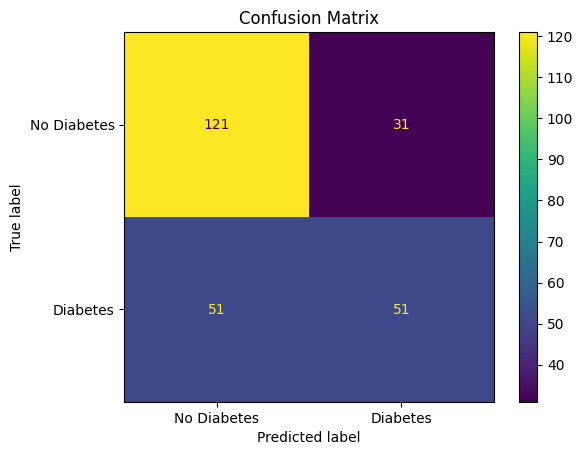

In [19]:
# إنشاء وعرض مصفوفة الارتباك
labels = ["No Diabetes", "Diabetes"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.title('Confusion Matrix')
plt.show()


In [20]:
pip install scikit-learn


In [21]:
from sklearn.preprocessing import MinMaxScaler

# فصل الميزات (X) والنتيجة المستهدفة (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# تطبيع البيانات لجعلها مناسبة لخوارزمية MultinomialNB (يجب أن تكون القيم إيجابية)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [22]:


# تقسيم البيانات إلى مجموعة تدريب (70%) ومجموعة اختبار (30%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import BernoulliNB


In [24]:

X = df.drop('Outcome', axis=1)  # الميزات
y = df['Outcome']  # النتائج

# تقسيم البيانات إلى مجموعة تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# إنشاء نموذج Multinomial Naive Bayes
model = MultinomialNB()

# تدريب النموذج
model.fit(X_train, y_train)

# إجراء التنبؤات على مجموعة الاختبار
y_pred = model.predict(X_test)

# تقييم النموذج
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuray)
print("F1 Score:", f1)
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.6771653543307087
F1 Score: 0.684746683234644
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.75      0.74        99
           1       0.53      0.51      0.52        55

    accuracy                           0.66       154
   macro avg       0.63      0.63      0.63       154
weighted avg       0.66      0.66      0.66       154

